In [167]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import numpy as np


steps = pd.read_csv("steps.csv", sep=';')
surv = pd.read_csv("survey.csv")


The above lines import the required libraries and make the CSV files into pandas dataframes.

In [168]:
df = pd.merge(steps, surv, on='id')
def above_200(x):
    if(x > 200 or x < 40): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)

df['mean_steps'] = df.loc[:, '20-6-2013' : '13-5-2014'].mean(axis = 1).round(decimals = 1)
df['med_steps'] = df.loc[:, '20-6-2013' : '13-5-2014'].median(axis = 1).round(decimals = 1)
med_steps = df['med_steps'].median()
mean_steps = df['mean_steps'].mean()
med_steps, mean_steps

def above_25000(x):
    if(x > 25000):
        return float('NaN')
    else:
        return x
df['mean_steps'] = df['mean_steps'].apply(above_25000)

These lines use the same cleaning methods as last assignment, but they are condensed into one script instead of spaced out over multiple.

Below here starts the main bulk of the week 2 assignment, starting with the **Feature Engineering**.

In [169]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,med_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.5,9860.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.4,5374.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.7,8220.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.2,3000.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.1,4986.5


In [181]:
df['bmi'] = df['weight'] / ((df['height'] /100)*(df['height'] /100))
df['bmi'] = df['bmi'].astype(float).round(1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,mean_steps,med_steps,bmi
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.5,9860.0,30.9
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,5687.4,5374.0,23.8
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.7,8220.0,25.6
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,<25,1,1,Bachelor,178.0,80.0,3633.2,3000.0,25.2
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Bachelor,167.0,61.0,5312.1,4986.5,21.9


This code calculates **BMI** by doing BMI = weight(kg)/height(cm)<sup>2</sup>.
Although BMI is not perfect for determining a healthy weight, it gives a good enough indication of who is a healthy weight.

According to the US CDC, a "healthy BMI is between 18.5 to 24.9". 


https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=Or%20determine%20your%20BMI%20by,falls%20within%20the%20overweight%20range.




# Data Analysis portion

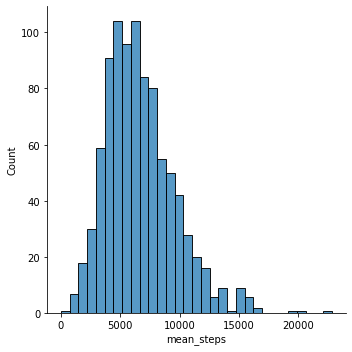

In [171]:
sns.displot(df['mean_steps'].dropna(), kde=False)

This is a graph showing the distribution of mean steps for each user in the dataset

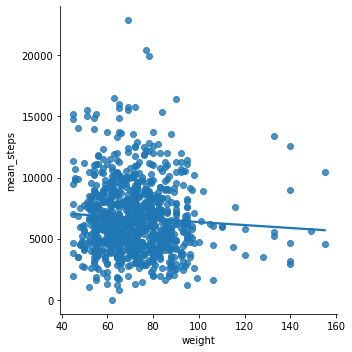

In [172]:
sns.lmplot(x='weight', y='mean_steps', data=df, ci=False)
plt.show()

This graph shows a scatterplot of weight and mean steps. At first glance, it looks like there is little to no correlation at all.

So lets check if there is a correlation using the pearson R calculation.

In [173]:
corr = df[['weight', 'mean_steps', 'bmi']].corr()
corr

,weight,mean_steps,bmi
weight,1.000000,-0.063273,0.866504
mean_steps,-0.063273,1.000000,-0.025476
bmi,0.866504,-0.025476,1.000000


It looks like there is a correlation between mean steps and BMI. 

However, there are plenty other variables within the dataset so a pairplot will help visualise any potential correlations, which can then later be tested.

To do so, the dataframe must be shortened so that every single day is not put into a plot and that only relevant columns are used.

In [174]:
df_subset = df[['id','gender','hh_size','education', 'education_1','height','weight', 'mean_steps', 'med_steps','bmi']]
df_subset.head()
dummies = pd.get_dummies(df_subset['gender'])
df_subset= pd.concat([df_subset, dummies], axis = 1)
df_subset = df_subset.drop(['education_1'], axis=1)
df_subset.fillna(0)

,id,gender,hh_size,education,height,weight,mean_steps,med_steps,bmi,Female,Male
0,1,Male,4,4,178.0,98.0,10205.5,9860.0,30.9,0,1
1,2,Male,1,3,180.0,77.0,5687.4,5374.0,23.8,0,1
2,3,Male,2,2,180.0,83.0,8301.7,8220.0,25.6,0,1
3,4,Male,1,1,178.0,80.0,3633.2,3000.0,25.2,0,1
4,5,Female,3,4,167.0,61.0,5312.1,4986.5,21.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Female,3,4,165.0,59.0,6282.1,6104.0,21.7,1,0
925,926,Male,3,5,192.0,90.0,4799.9,4240.0,24.4,0,1
926,927,Male,2,2,181.0,71.0,10030.3,8849.0,21.7,0,1
927,928,Female,1,1,172.0,65.0,15679.7,14084.0,22.0,1,0


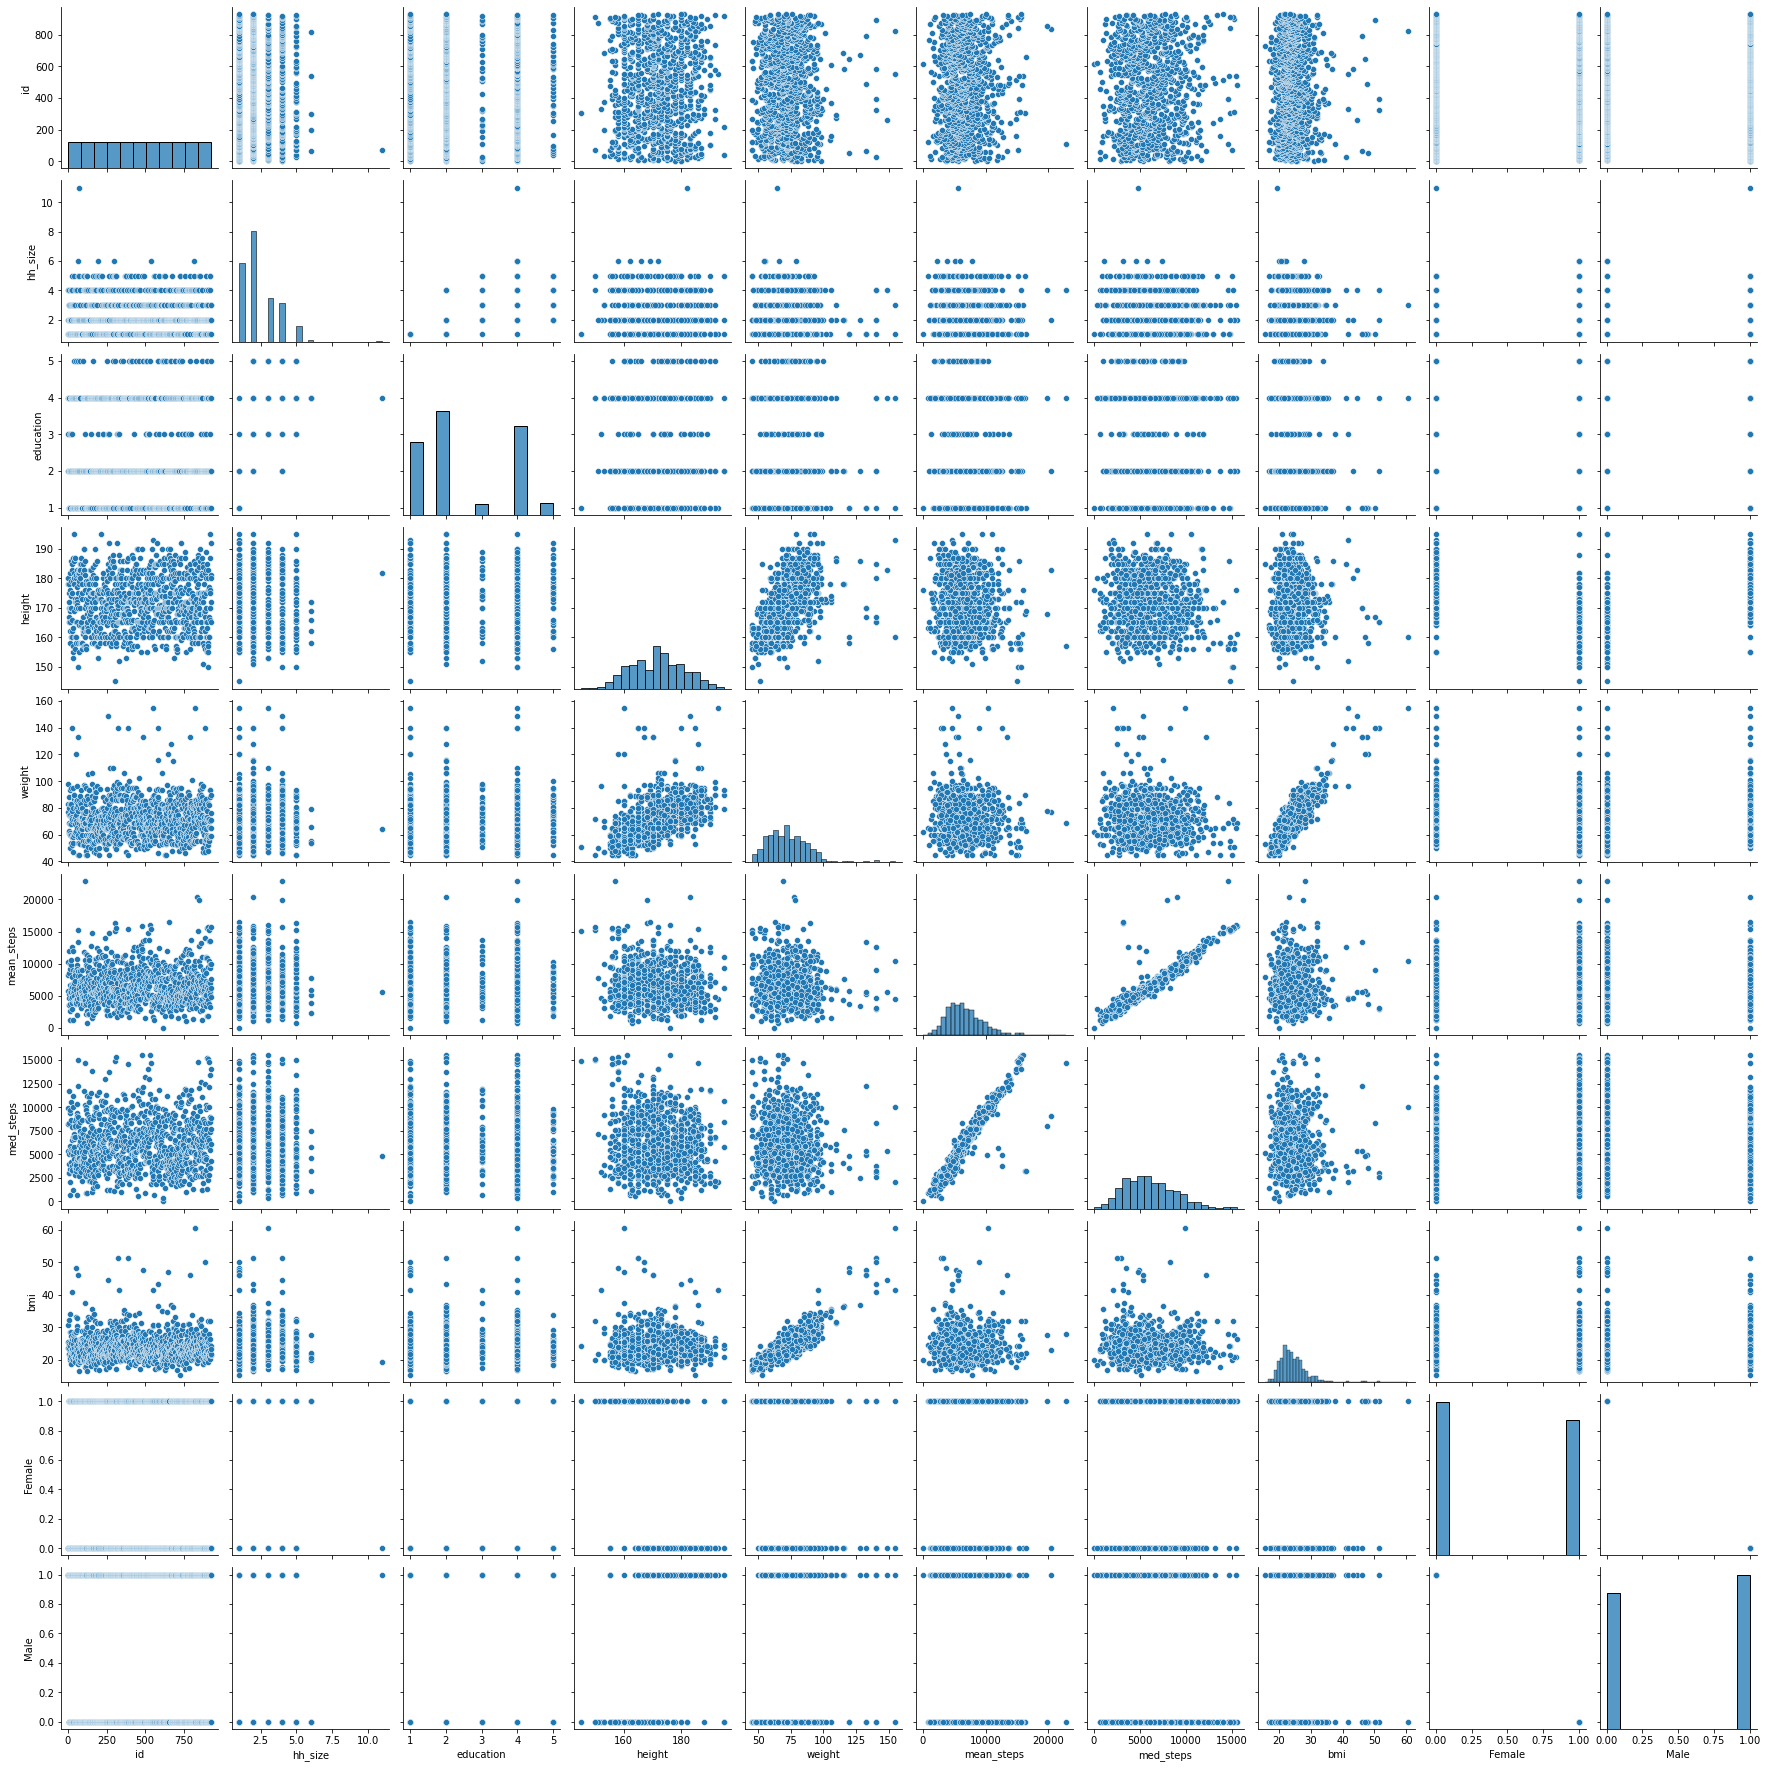

In [175]:
sns.pairplot(df_subset)
plt.show()

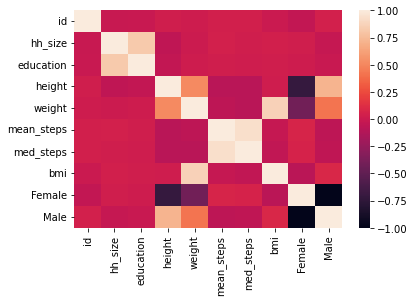

,id,hh_size,education,height,weight,mean_steps,med_steps,bmi,Female,Male
id,1.000000,-0.022413,-0.007893,0.028926,0.010215,0.035712,0.033739,-0.003773,-0.042834,0.042834
hh_size,-0.022413,1.000000,0.825585,-0.059704,0.005652,0.040942,0.030918,0.035095,0.026577,-0.026577
education,-0.007893,0.825585,1.000000,-0.046343,0.008233,0.023945,0.023176,0.028435,0.012117,-0.012117
height,0.028926,-0.059704,-0.046343,1.000000,0.508194,-0.086249,-0.088879,0.020389,-0.713257,0.713257
weight,0.010215,0.005652,0.008233,0.508194,1.000000,-0.063273,-0.088655,0.866504,-0.419563,0.419563
mean_steps,0.035712,0.040942,0.023945,-0.086249,-0.063273,1.000000,0.932572,-0.025476,0.066560,-0.066560
med_steps,0.033739,0.030918,0.023176,-0.088879,-0.088655,0.932572,1.000000,-0.052146,0.061800,-0.061800
bmi,-0.003773,0.035095,0.028435,0.020389,0.866504,-0.025476,-0.052146,1.000000,-0.083290,0.083290
Female,-0.042834,0.026577,0.012117,-0.713257,-0.419563,0.066560,0.061800,-0.083290,1.000000,-1.000000
Male,0.042834,-0.026577,-0.012117,0.713257,0.419563,-0.066560,-0.061800,0.083290,-1.000000,1.000000


In [176]:
corr = df_subset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()
corr

Key things to note from both the pair plot and the correlation matrix / heatmap.

- ID cannot be compared to anything and given a correlation because it is simply a numerical identifier.
- Household size has a strong correlation to every other variable in the dataset, however it could be because it increases in set steps, all being whole numbers (eg. HH_size could be 1, 2, 4, 8, etc).
- Education has a strong correlation with weight, however, it could be for similar reasons to previous.
- Gender has no meaningful relationships or correlations. It is linked to Education but thats because everyone recieves an education

Therefore there are no clear / interesting correlations shown from the information within this datasets, meaning no new insights could be found.

# <ins> _Week 3 Assignment Start_ </ins>

**What is linear regression?**
It is predictive analysis that predicts and shows the relationship between 2 variables in a line of best fit format.


In [184]:
y = df_subset['mean_steps']
X = df_subset.loc[:,'hh_size':'Male']
X = X.reset_index()
X.fillna(0)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X.head()

,index,hh_size,education,height,weight,mean_steps,med_steps,bmi,Female,Male
0,0,4,4,178.0,98.0,10205.5,9860.0,30.9,0,1
1,1,1,3,180.0,77.0,5687.4,5374.0,23.8,0,1
2,2,2,2,180.0,83.0,8301.7,8220.0,25.6,0,1
3,3,1,1,178.0,80.0,3633.2,3000.0,25.2,0,1
4,4,3,4,167.0,61.0,5312.1,4986.5,21.9,1,0


In [185]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [186]:
from sklearn.linear_model import LinearRegression

lm.fit(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

I spent 2 hours trying to figure out what this means and how to fix it. Searched as many sites as I could, read through every line of code in the error and could not find how to fix it. Sorry.